# Registering scans with different shapes and scanning steps
As previously mentinoed many registration algorithms require the array to have the same shape. In general for comparing two signals the same sampling should be also used. Sometimes scans are performed with different scanning step while this shold be avoided when two measurement have to be compared (cfr. Meas. Sci. Technol.21 (2010) 032001).
There are different algorithms to scale an array so that it results in an array with the same scanning step and possibly the same shape. However the output of these algoritms can be very different for assessing the effectiveness of these algorithms in scaling a surface a test surface has been created from a 2D function. 
The output of the function has been computed using two different sampling intervals. 

In [22]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from skimage.transform import rescale
import matplotlib 
plt.rcParams["figure.figsize"] = (20,15)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
#Test data
x, y = np.mgrid[-5:5:0.25, -6:6:0.25]

z = np.array(np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2) )#First sampling interval: Test data

scalefactor = 2
iscalefactor = 1/float(scalefactor)
xr, yr = np.mgrid[-5:5:0.25*iscalefactor, -6:6:0.25*iscalefactor]
real_z = np.array(np.sqrt(xr**2 + yr**2) + np.sin(xr**2 + yr**2) )#Second sampling interval: Ground truth 

The output of the first samping interval has been scaled using different algorithms to the achive the second sampling interval.

In [23]:

x1, y1 = np.mgrid[0:z.shape[0]:1, 0:z.shape[1]:1]
xnew, ynew = np.mgrid[0:z.shape[0]:iscalefactor, 0:z.shape[1]:iscalefactor]

f = interpolate.interp2d(range(0,z.shape[1]), range(0,z.shape[0]), z, kind='cubic')
znew_interp2d = f(ynew[0,:],xnew[:,0])

tck = interpolate.bisplrep(x1, y1, z, s=0)
znew_bisplrep = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

znew_zoom = scipy.ndimage.zoom(z, scalefactor, order=0)

znew_resacle = rescale(z,scalefactor)


f2 = interpolate.RectBivariateSpline(range(0,z.shape[0]),
                                     range(0,z.shape[1]),
                                     z, kx=1, ky=1)
znew_RectBivariateSpline = f2(xnew[:,0], ynew[0,:])

znew_kron = np.kron(z, np.ones((scalefactor,scalefactor), 
                               dtype=float))

After the scaling process the output has been compared using the output of the function with the same sampling interval as a  ground truth.

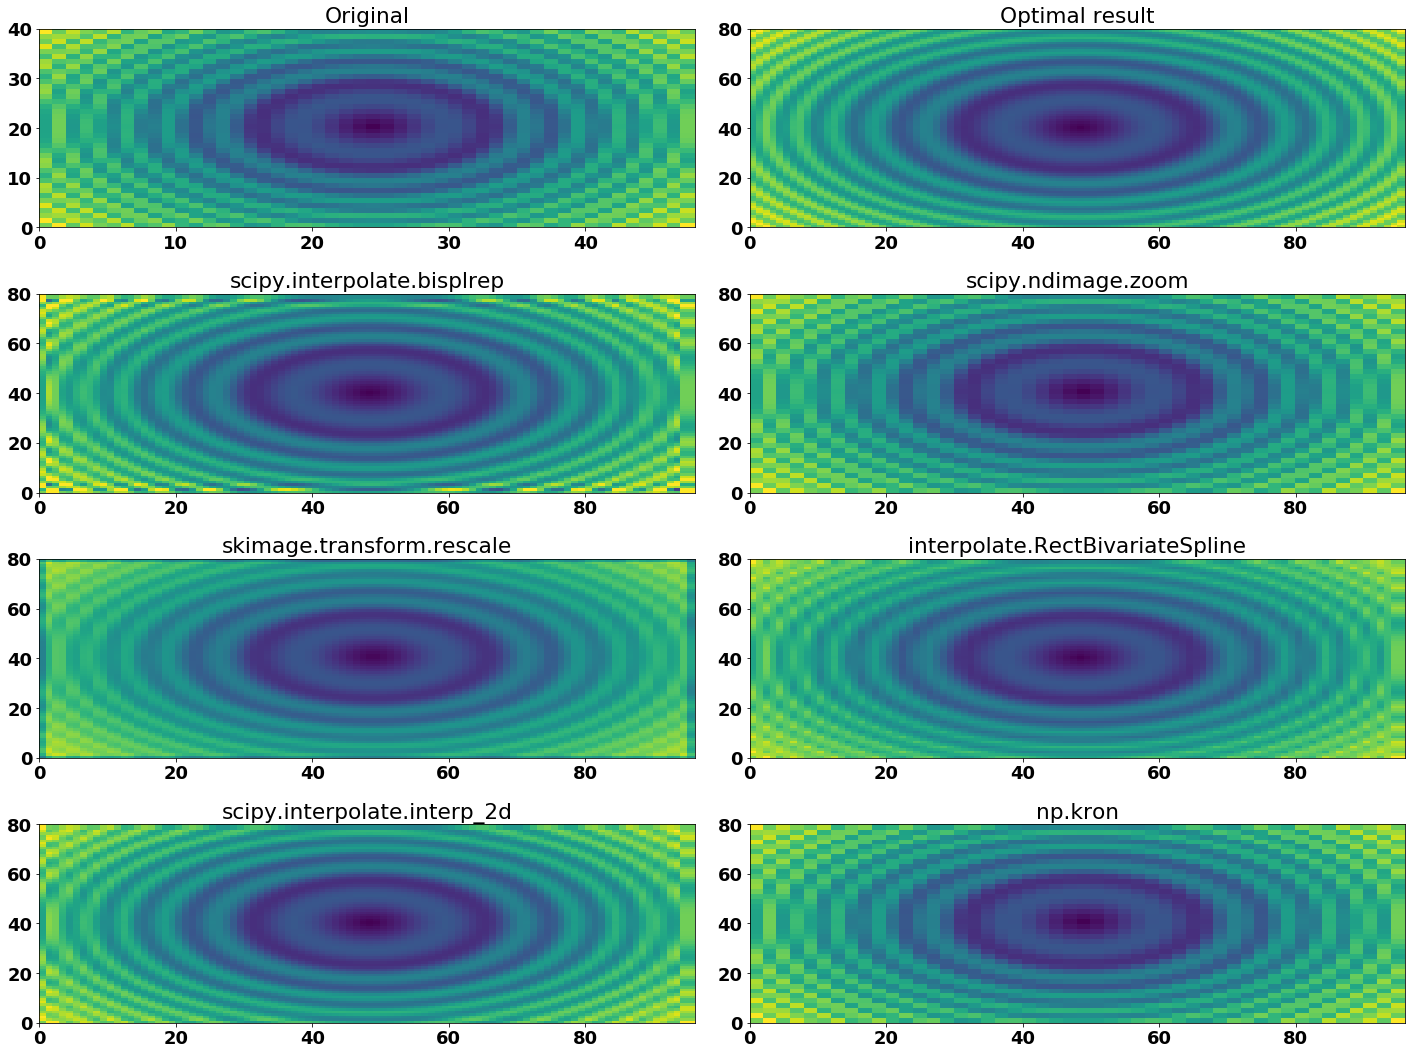

In [24]:
min_c = np.min(real_z)
max_c = np.max(real_z)

fig = plt.figure()
ax = fig.add_subplot(421)
pc = ax.pcolormesh(z)
ax.set_title('Original')

ax2 = fig.add_subplot(422)
pc1 = ax2.pcolormesh(real_z)
ax2.set_title('Optimal result')
pc1.set_clim(min_c,max_c)

ax3 = fig.add_subplot(423)
pc2 = ax3.pcolormesh(znew_bisplrep)
ax3.set_title('scipy.interpolate.bisplrep')
pc2.set_clim(min_c,max_c)

ax4 = fig.add_subplot(424)
pc3 = ax4.pcolormesh(znew_zoom)
ax4.set_title('scipy.ndimage.zoom')
pc3.set_clim(min_c,max_c)

ax5 = fig.add_subplot(425)
pc4 = ax5.pcolormesh(znew_resacle)
ax5.set_title('skimage.transform.rescale')
pc4.set_clim(min_c,max_c)

ax6 = fig.add_subplot(426)
pc5 = ax6.pcolormesh(znew_RectBivariateSpline)
ax6.set_title('interpolate.RectBivariateSpline')
pc5.set_clim(min_c,max_c) 

ax7 = fig.add_subplot(427)
pc7 = ax7.pcolormesh(znew_interp2d)
ax7.set_title('scipy.interpolate.interp_2d')
pc7.set_clim(min_c,max_c)

ax8 = fig.add_subplot(428)
pc8 =ax8.pcolormesh(znew_kron)
ax8.set_title('np.kron')
pc8.set_clim(min_c,max_c)

fig.tight_layout()
plt.show()

For allowing a better comparison the ground truth has been subtracted to the computed data.

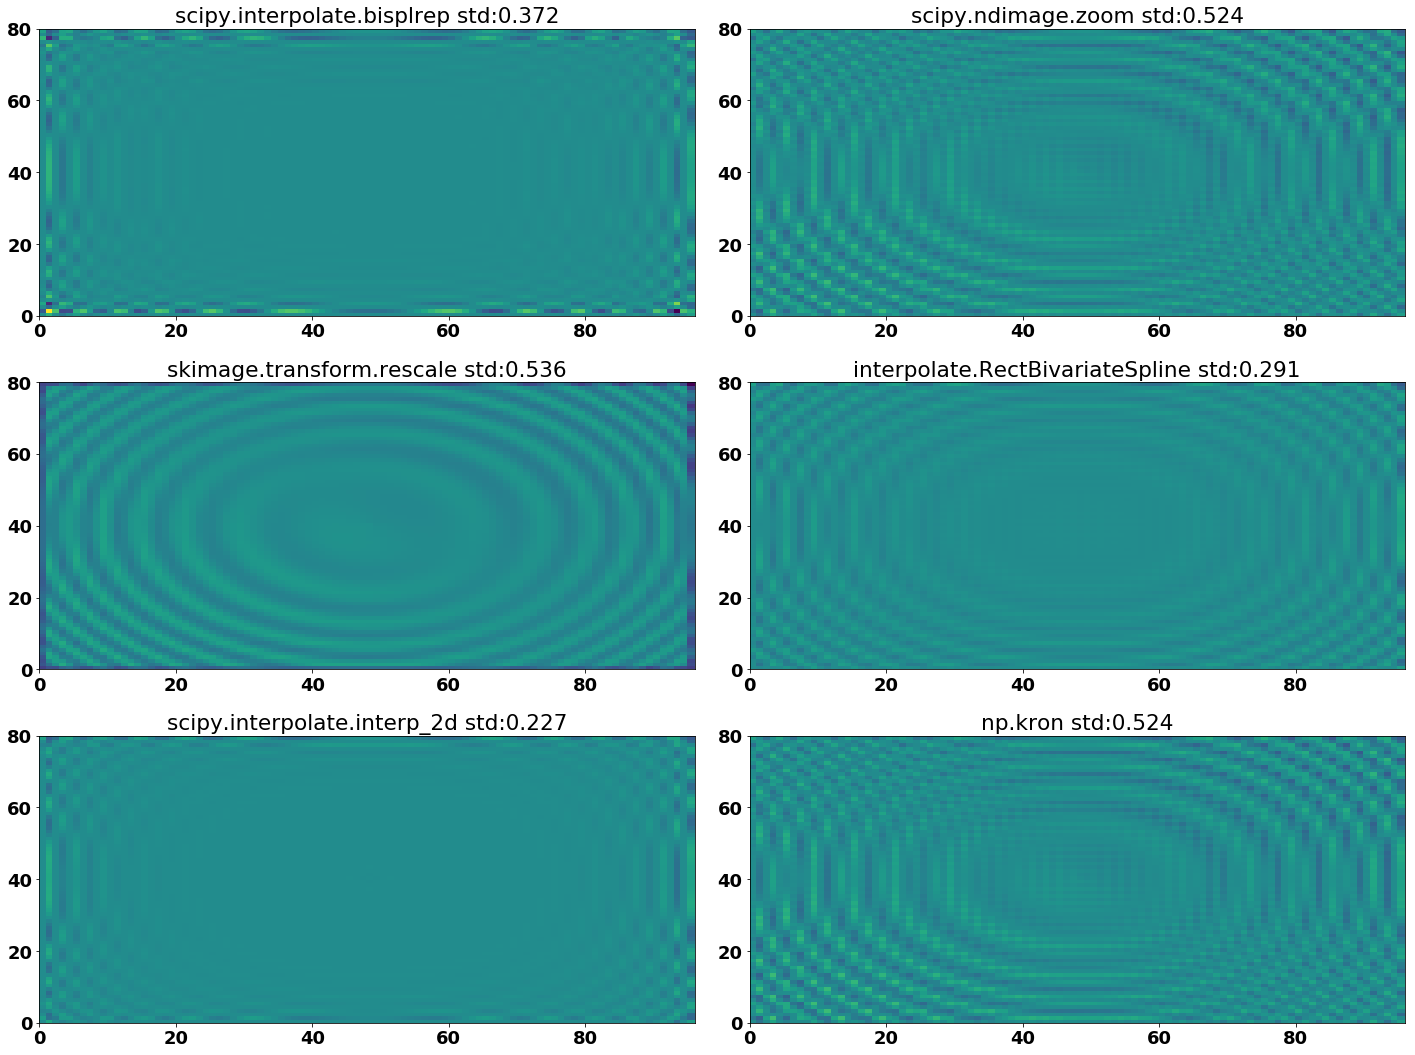

In [25]:
fig2 = plt.figure()

results = np.array([znew_bisplrep,znew_zoom,znew_resacle,
                   znew_RectBivariateSpline,
                   znew_interp2d,znew_kron])

sub = results - real_z
min_s = np.min(sub)
max_s = np.max(sub)

ax3 = fig2.add_subplot(321)
pi1= ax3.pcolormesh(sub[0])
ax3.set_title('scipy.interpolate.bisplrep std:%.3f' %(np.std(sub[0])))
pi1.set_clim(min_s,max_s)

ax4 = fig2.add_subplot(322)
pi2 = ax4.pcolormesh(sub[1])
ax4.set_title('scipy.ndimage.zoom std:%.3f' %(np.std(sub[1])))
pi2.set_clim(min_s,max_s)

ax5 = fig2.add_subplot(323)
pi3 = ax5.pcolormesh(sub[2])
ax5.set_title('skimage.transform.rescale std:%.3f' %(np.std(sub[2])))
pi3.set_clim(min_s,max_s)

ax6 = fig2.add_subplot(324)
pi4 = ax6.pcolormesh(sub[3])
ax6.set_title('interpolate.RectBivariateSpline std:%.3f' %(np.std(sub[3])))
pi4.set_clim(min_s,max_s)

ax7 = fig2.add_subplot(325)
pi5 = ax7.pcolormesh(sub[4])
ax7.set_title('scipy.interpolate.interp_2d std:%.3f' %(np.std(sub[4])))
pi5.set_clim(min_s,max_s)

ax8 = fig2.add_subplot(326)
pi6 = ax8.pcolormesh(sub[5])
ax8.set_title('np.kron std:%.3f' %(np.std(sub[5])))
pi6.set_clim(min_s,max_s)

fig2.tight_layout()
plt.show()

`scipy.interpolate.interp_2d` shows better results. The same procedure has been applied to other test surfaces. 

In [26]:
#Test data
x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))
xr, yr = np.mgrid[-1:1:20j*scalefactor, -1:1:20j*scalefactor]
real_z = (xr+yr) * np.exp(-6.0*(xr*xr+yr*yr))


Here are shown directly the differences between the test and the groud truth.

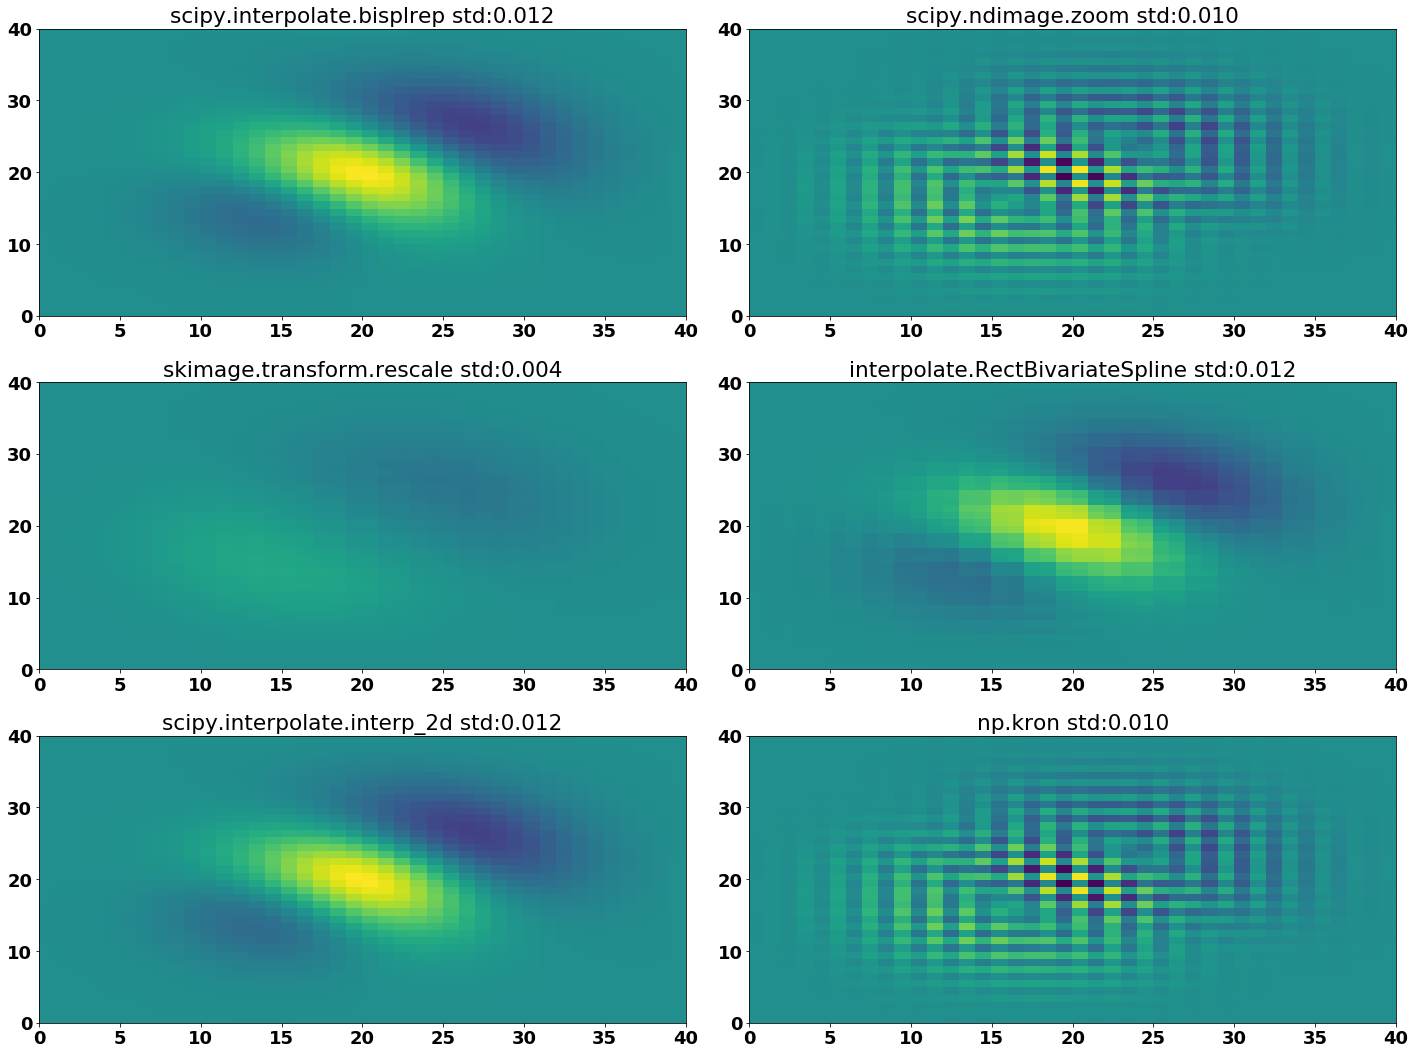

In [27]:

x1, y1 = np.mgrid[0:z.shape[0]:1, 0:z.shape[1]:1]
xnew, ynew = np.mgrid[0:z.shape[0]:iscalefactor, 0:z.shape[1]:iscalefactor]

f = interpolate.interp2d(range(0,z.shape[1]), range(0,z.shape[0]), z, kind='cubic')
znew_interp2d = f(ynew[0,:],xnew[:,0])

tck = interpolate.bisplrep(x1, y1, z, s=0)
znew_bisplrep = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

znew_zoom = scipy.ndimage.zoom(z, scalefactor, order=0)

znew_resacle = rescale(z,scalefactor)


f2 = interpolate.RectBivariateSpline(range(0,z.shape[0]),
                                     range(0,z.shape[1]),
                                     z, kx=1, ky=1)
znew_RectBivariateSpline = f2(xnew[:,0], ynew[0,:])

znew_kron = np.kron(z, np.ones((scalefactor,scalefactor), 
                               dtype=float))


fig2 = plt.figure()

results = np.array([znew_bisplrep,znew_zoom,znew_resacle,
                   znew_RectBivariateSpline,
                   znew_interp2d,znew_kron])

sub = results - real_z
min_s = np.min(sub)
max_s = np.max(sub)

ax3 = fig2.add_subplot(321)
pi1= ax3.pcolormesh(sub[0])
ax3.set_title('scipy.interpolate.bisplrep std:%.3f' %(np.std(sub[0])))
pi1.set_clim(min_s,max_s)

ax4 = fig2.add_subplot(322)
pi2 = ax4.pcolormesh(sub[1])
ax4.set_title('scipy.ndimage.zoom std:%.3f' %(np.std(sub[1])))
pi2.set_clim(min_s,max_s)

ax5 = fig2.add_subplot(323)
pi3 = ax5.pcolormesh(sub[2])
ax5.set_title('skimage.transform.rescale std:%.3f' %(np.std(sub[2])))
pi3.set_clim(min_s,max_s)

ax6 = fig2.add_subplot(324)
pi4 = ax6.pcolormesh(sub[3])
ax6.set_title('interpolate.RectBivariateSpline std:%.3f' %(np.std(sub[3])))
pi4.set_clim(min_s,max_s)

ax7 = fig2.add_subplot(325)
pi5 = ax7.pcolormesh(sub[4])
ax7.set_title('scipy.interpolate.interp_2d std:%.3f' %(np.std(sub[4])))
pi5.set_clim(min_s,max_s)

ax8 = fig2.add_subplot(326)
pi6 = ax8.pcolormesh(sub[5])
ax8.set_title('np.kron std:%.3f' %(np.std(sub[5])))
pi6.set_clim(min_s,max_s)

fig2.tight_layout()
plt.show()

In this case rescale algorithm works better compared to `interp_2d`.

## Result and discussion
It seems not straighforward finding the best algorithm to rescale a surface to allow an effective comparison between surfaces recorded with different scanning steps. interp_2d and rescale shown promising results. 

Tests should be run over real surfaces undersample, a similar work has been done previuously for 1D profiles. 